##CM3111 Assessment
#Water well logs interpretation using machine learning


##1.1	Dataset
The dataset comprises geophysical well logs data pertaining to deep water wells located in Saudi Arabia. I was an integral member of the geologists' team responsible for the collection, processing, and interpretation of these data, specifically for underground water projects spanning the period from 2012 to 2019.
The selection of this dataset is motivated by the potential it holds in offering a significant contribution to the field of geophysical water exploration.


##1.2	Related Work & Data Exploration.
#1. Dataset Overview
The dataset is a geophysical well logs records includes parameters such as natural gamma ray emissions, electric resistivity, density, temperature, spontaneous potential, and neutron counts. It is utilized for the purpose of identifying water-bearing zones within the subsurface through the interpretation of these logs. The freshwater zone exhibits distinctive characteristics in the logs, including low gamma ray emissions, a semi-linear and consistent decrease in the separation between short and long resistivity curves, and a relatively high neutron count.


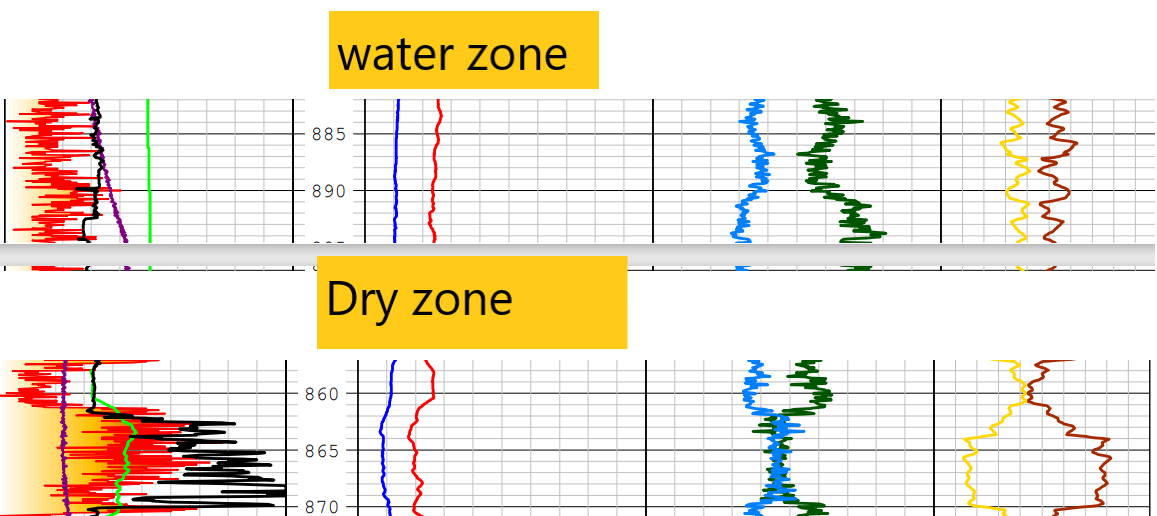

##*2*.Objectives:
The primary objective is to use this dataset  to serve as the foundation for constructing a robust Machine Learning model. This model will possess the capability to discern various log curve behaviors, enabling it to accurately pinpoint water-bearing zones within the provided well logs.


# 3.Peer-reviewed paper:

#4. Data Loading & Exploration:

In [23]:
# import required variables
import pandas as pd
import numpy as np

In [120]:
# Loading Dataset
df = pd.read_csv('/content/Wells_T202_T213.csv')
print(df.columns)


Index(['Well_ID', 'Depth', 'GAM(NAT)', 'RES(16N)', 'RES(64N)', 'NEUTRON',
       'Interpretation', 'Interpretation_N'],
      dtype='object')


In [121]:
# Selecting the feature
df = pd.read_csv('/content/Wells_T202_T213.csv', usecols=['Well_ID', 'Depth','GAM(NAT)', 'RES(16N)', 'RES(64N)', 'NEUTRON',
       'Interpretation', 'Interpretation_N'])

In [ ]:
 # Showing number of columns and rows for each well data
print(f"The dataset for well_ID 1-T-209 has {df[df['Well_ID'].isin(['1-T-209'])].shape[0]} rows and {df[df['Well_ID'].isin(['1-T-209'])].shape[1]} columns")
print(f"The dataset for well_ID 1-T-210 has {df[df['Well_ID'].isin(['1-T-210'])].shape[0]} rows and {df[df['Well_ID'].isin(['1-T-210'])].shape[1]} columns")
print(f"The dataset for well_ID 1-T-211 has {df[df['Well_ID'].isin(['1-T-211'])].shape[0]} rows and {df[df['Well_ID'].isin(['1-T-211'])].shape[1]} columns")
print(f"The dataset for well_ID 1-T-112 has {df[df['Well_ID'].isin(['1-T-112'])].shape[0]} rows and {df[df['Well_ID'].isin(['1-T-112'])].shape[1]} columns")
print(f"The dataset for well_ID 1-T-213 has {df[df['Well_ID'].isin(['1-T-213'])].shape[0]} rows and {df[df['Well_ID'].isin(['1-T-213'])].shape[1]} columns")
print(f"The dataset for well_ID 1-T-202 has {df[df['Well_ID'].isin(['1-T-202'])].shape[0]} rows and {df[df['Well_ID'].isin(['1-T-202'])].shape[1]} columns")

The dataset for well_ID 1-T-209 has 3596 rows and 8 columns
The dataset for well_ID 1-T-210 has 3409 rows and 8 columns
The dataset for well_ID 1-T-211 has 3271 rows and 8 columns
The dataset for well_ID 1-T-112 has 3136 rows and 8 columns
The dataset for well_ID 1-T-213 has 3436 rows and 8 columns
The dataset for well_ID 1-T-202 has 13837 rows and 8 columns


In [ ]:
# Checking the data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42390 entries, 0 to 42389
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Well_ID            42390 non-null  object 
 1   Depth              42390 non-null  float64
 2   GAM(NAT)           42390 non-null  float64
 3   RES(16N)           42390 non-null  float64
 4   RES(64N)           42390 non-null  float64
 5   NEUTRON            42390 non-null  float64
 6   Interpretation     42390 non-null  object 
 7   Interpretations_N  42390 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.6+ MB


In [ ]:
#  Obtaining nformation about other feature
# for every column
for i in df.columns:
    # print how many features it has
    print(i, len(df[i].unique()))



Well_ID 10
Depth 12989
GAM(NAT) 10024
RES(16N) 27405
RES(64N) 28910
NEUTRON 32108
Interprate 2
Interprate_NUM 2


In [ ]:
 #  Statistical information about the data set
 df.describe()

,Depth,GAM(NAT),RES(16N),RES(64N),NEUTRON,Interpretations_N
count,42390.000000,42390.000000,42390.000000,42390.000000,42390.000000,42390.000000
mean,356.719436,72.826934,93.828962,152.184798,741.684140,0.462184
std,215.851352,62.467551,40.711900,85.575402,270.865505,0.498574
min,1.600000,0.000000,8.100060,8.300000,159.821000,0.000000
25%,182.600000,26.513225,70.751400,97.250000,542.000000,0.000000
50%,334.000000,59.074650,91.450000,134.862000,725.129000,0.000000
75%,485.400000,105.400000,117.511000,204.380000,945.026000,1.000000
max,900.600000,936.834000,232.796000,541.009000,1392.600000,1.000000


#1.3 Data Pre-processing

"This dataset contains information for six different water wells logs. I merged them into one csv file and added a column for the well ID,  in order to prepare the data for regression modeling. I converted the outcome into a numeric value instead of a classification (Water/Dry). I replaced 'Water' with '1' and 'Dry' with '0'."

In [153]:
# data cleaning to remove outliers, as well as three different types of data scaling: Min-Max normalization, Standard Scaling (Z-Score Standardization), and Robust Scaling.

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


def clean_and_scale_data(df, columns, threshold=3, scale_method='min_max'):
    df_clean = df.copy()

    # Remove outliers and apply scaling
    for column in columns:
        # Remove outliers using Robust Scaling
        median = df_clean[column].median()
        iqr = df_clean[column].quantile(0.75) - df_clean[column].quantile(0.25)
        z_scores = (df_clean[column] - median) / iqr
        outliers = (z_scores.abs() > threshold)
        df_clean.loc[outliers, column] = median  # Replace outliers with median

        # Apply scaling
        if scale_method == 'min_max':
            scaler = MinMaxScaler()
        elif scale_method == 'standard':
            scaler = StandardScaler()
        elif scale_method == 'robust':
            scaler = RobustScaler()
        else:
            raise ValueError("Invalid scale_method. Use 'min_max', 'standard', or 'robust'.")

        df_clean[[column]] = scaler.fit_transform(df_clean[[column]])

    return df_clean


columns_to_clean = ['GAM(NAT)', 'RES(16N)', 'RES(64N)', 'NEUTRON']
df_clean_min_max = clean_and_scale_data(df, columns_to_clean, scale_method='min_max')

df_clean_standard = clean_and_scale_data(df, columns_to_clean, scale_method='standard')

df_clean_robust = clean_and_scale_data(df, columns_to_clean, scale_method='robust')

df = df_clean_robust


#2 Modelling

In [154]:
# the dataset should have 6 well, to confirm that by call the unique() Function
df['Well_ID'].unique()

array(['1-T-209', '1-T-210', '1-T-211', '1-T-112', '1-T-213', '1-T-202'],
      dtype=object)

In [155]:
# Deviding dataset to training & testing
training_wells = (['1-T-109', '1-T-210', '1-T-202', '1-T-213'])
testing_well = ([ '1-T-112'])

In [156]:
# extract the data from the dataset for training and testing
from sklearn.model_selection import train_test_split
train_val_df = df[df['Well_ID'].isin(training_wells)].copy()
test_df = df[df['Well_ID'].isin(testing_well)].copy()

# 2.1 Linear Regression model

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Selecting training & target features
X = train_val_df[[ 'GAM(NAT)', 'RES(16N)', 'RES(64N)', 'NEUTRON']]
y = train_val_df[['Interpretation_N']]

# seperating the dataset into training and validation data
X_train, X_val, y_train, y_val =train_test_split(X, y, test_size=0.2)

# Initialize the linear regression model
lineModel = LinearRegression()

# Train the model
lineModel.fit(X_train, y_train)


LinearRegression()

Mean Squared Error (MSE): 0.035509934047402415


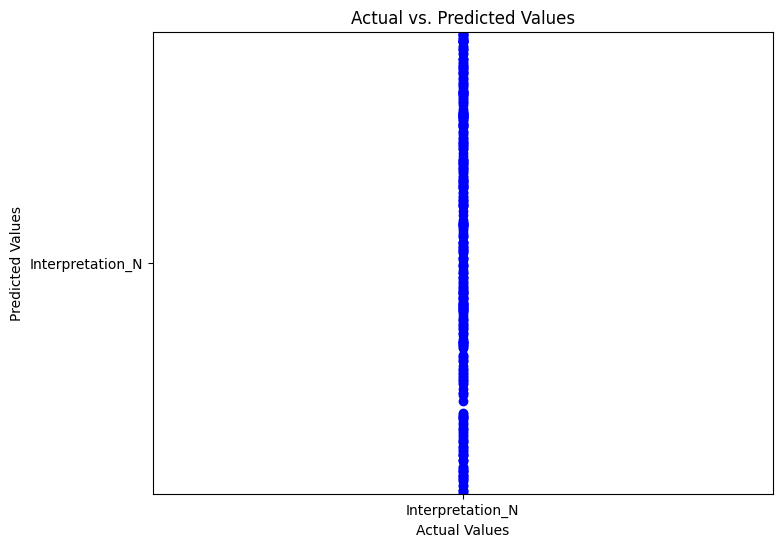

In [158]:
# Predict on the validation set
y_val_predicted = lineModel.predict(X_val)

# Calculate Mean Squared Error for validation
mse = mean_squared_error(y_val, y_val_predicted)

# Print the evaluation metric
print(f'Mean Squared Error (MSE): {mse}')

# Visualize the predicted values vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_predicted, color='blue')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Mean Squared Error (MSE): 0.04285338301528896


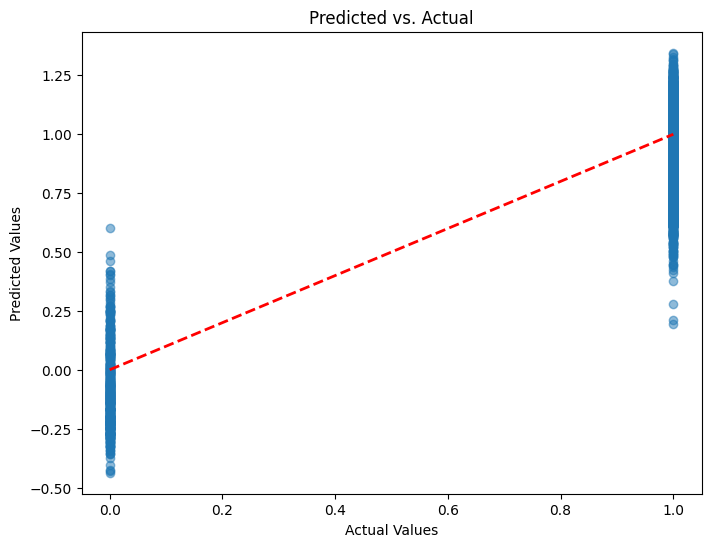

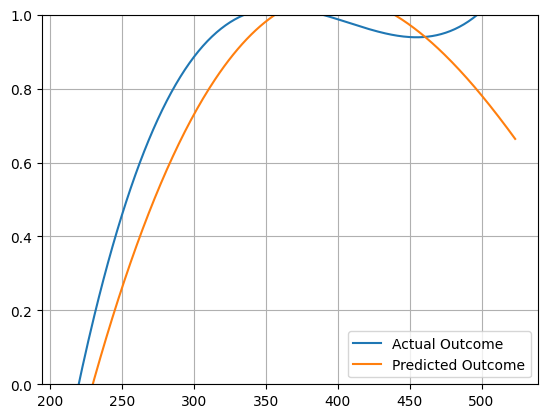

In [159]:
# Testing the model
test_well_x = test_df[['GAM(NAT)', 'RES(16N)', 'RES(64N)', 'NEUTRON']]
test_df['TEST_DT'] = lineModel.predict(test_well_x)

actual_values = test_df['Interpretation_N']
predicted_values = test_df['TEST_DT']

# Calculate Mean Squared Error Testing
mse = mean_squared_error(actual_values, predicted_values)
# Print the evaluation metric
print(f'Mean Squared Error (MSE): {mse}')


# Visualize the predicted values vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, alpha=0.5)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='--', lw=2)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Ploting the Actual Outcome and Predicted Outcome Vs well Depth
x = test_df['Depth']
y_actual = test_df['Interpretation_N']
y_predicted = test_df['TEST_DT']

# Create a smoother curve by polynomial interpolation
x_smooth = np.linspace(x.min(), x.max(), 300)
p_actual = np.polyfit(x, y_actual, 3)
p_predicted = np.polyfit(x, y_predicted, 3)

y_actual_smooth = np.polyval(p_actual, x_smooth)
y_predicted_smooth = np.polyval(p_predicted, x_smooth)

# Plot the smoothed curves
plt.plot(x_smooth, y_actual_smooth, label='Actual Outcome')
plt.plot(x_smooth, y_predicted_smooth, label='Predicted Outcome')
plt.ylim(0, 1)  # Adjusted y-axis limits
plt.grid()
plt.legend()
plt.show()

# 2.2 Logistic Regression Model

In [160]:
from sklearn.linear_model import LogisticRegression

# Selecting training & target features
X = train_val_df[['GAM(NAT)', 'RES(16N)', 'RES(64N)', 'NEUTRON']]
y = train_val_df[['Interpretation']]

# seperating the dataset into training and validation data
X_train, X_val, y_train, y_val =train_test_split(X, y, test_size=0.2)

# Initialize the logistic regression model
logRegModel = LogisticRegression()

# Train the model
logRegModel.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Validation Test Accuracy: 0.9912980420594634
Validation Test Classification Report:
              precision    recall  f1-score   support

         Dry       0.99      0.99      0.99      2108
       Water       0.99      0.99      0.99      2029

    accuracy                           0.99      4137
   macro avg       0.99      0.99      0.99      4137
weighted avg       0.99      0.99      0.99      4137



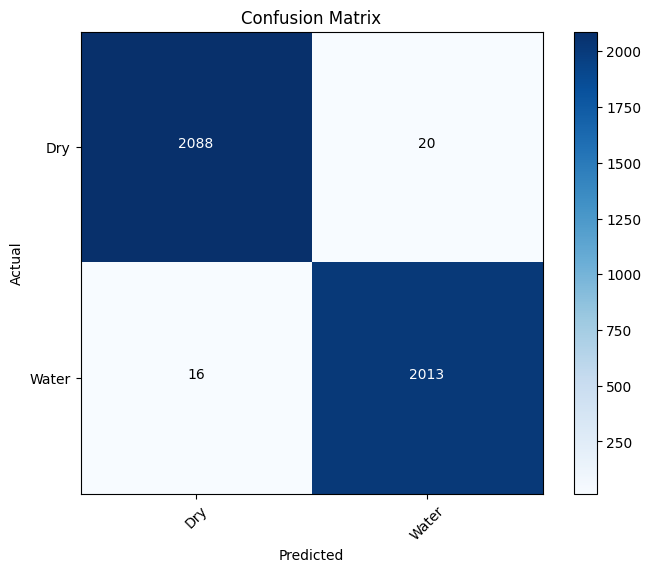

In [161]:
# Predict on the validation set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools

y_val_predicted= logRegModel.predict(X_val)

# Evaluate the model on the validation set
accuracy_validation = accuracy_score(y_val, y_val_predicted)
report_validation = classification_report(y_val, y_val_predicted)

# Print the evaluation metrics
print(f'Validation Test Accuracy: {accuracy_validation}')
print(f'Validation Test Classification Report:\n{report_validation}')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_predicted)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Dry', 'Water']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
thresh = conf_matrix.max() / 2
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()

Actual Test Accuracy: 0.9958545918367347
Actual Test Classification Report:
              precision    recall  f1-score   support

         Dry       0.98      0.99      0.99       524
       Water       1.00      1.00      1.00      2612

    accuracy                           1.00      3136
   macro avg       0.99      0.99      0.99      3136
weighted avg       1.00      1.00      1.00      3136



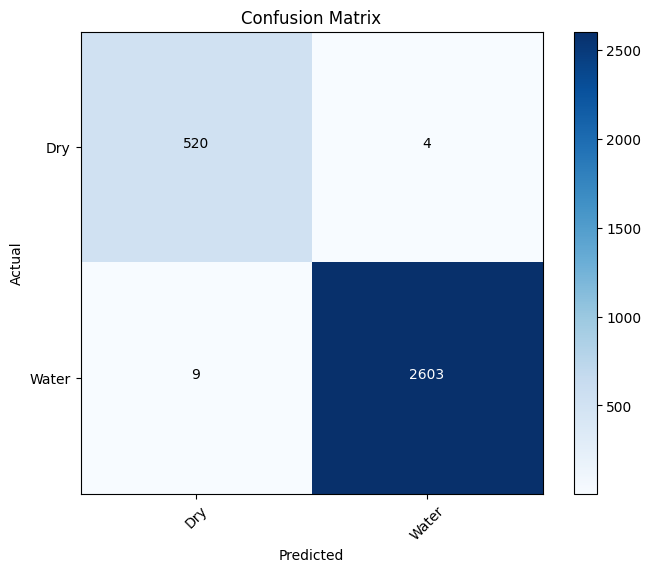

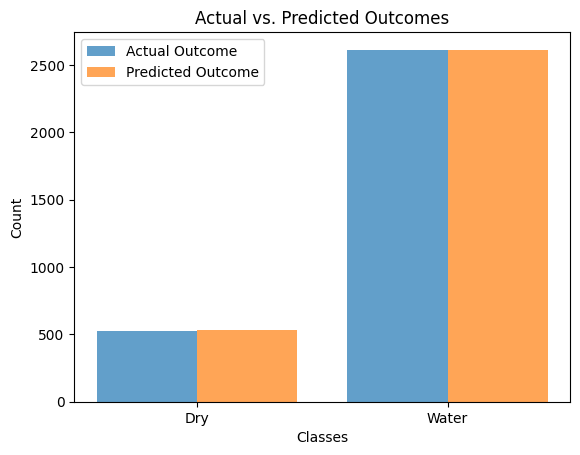

In [162]:
# Testing the model on selected test well
test_well_x = test_df[[ 'GAM(NAT)', 'RES(16N)', 'RES(64N)', 'NEUTRON']]
test_df['TEST_DT'] = logRegModel.predict(test_well_x)

# Evaluate the model on the  test set
y_actual = test_df['Interpretation']
y_predicted = test_df['TEST_DT']
accuracy_actual = accuracy_score(y_actual, y_predicted)
report_actual = classification_report(y_actual, y_predicted)


print(f'Actual Test Accuracy: {accuracy_actual}')
print(f'Actual Test Classification Report:\n{report_actual}')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_actual, y_predicted)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Dry', 'Water']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
thresh = conf_matrix.max() / 2
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()


# create a bar plot to compare the actual and predicted outcomes
# Create an array of unique classes
classes = test_df['Interpretation'].unique()

# Count the occurrences of each class in y_actual and y_predicted
actual_counts = [sum(y_actual == cls) for cls in classes]
predicted_counts = [sum(y_predicted == cls) for cls in classes]

# Set up the positions of the bars and their width
x = range(len(classes))
width = 0.4

# Create the bar plots
plt.bar(x, actual_counts, width, label='Actual Outcome', align='center', alpha=0.7)
plt.bar([i + width for i in x], predicted_counts, width, label='Predicted Outcome', align='center', alpha=0.7)

# Set labels, title, and legend
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Outcomes')
plt.xticks([i + width/2 for i in x], classes)
plt.legend()

# Show the plot
plt.show()







The accuracy is approximately 91.84%. This means that the model correctly predicted the class of the samples about 91.84% of the time

# 2.3 Support Vector Machines (SVM)

In [163]:
from sklearn.svm import LinearSVC

# Selecting training & target features
X = train_val_df[['GAM(NAT)', 'RES(16N)', 'RES(64N)', 'NEUTRON']]
y = train_val_df[['Interpretation']]

# seperating the dataset into training and validation data
X_train, X_val, y_train, y_val =train_test_split(X, y, test_size=0.2)

# Initialize the LinearSVC model
svm_model = LinearSVC()

# Train the model
svm_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC()

Accuracy: 0.9922649262750786


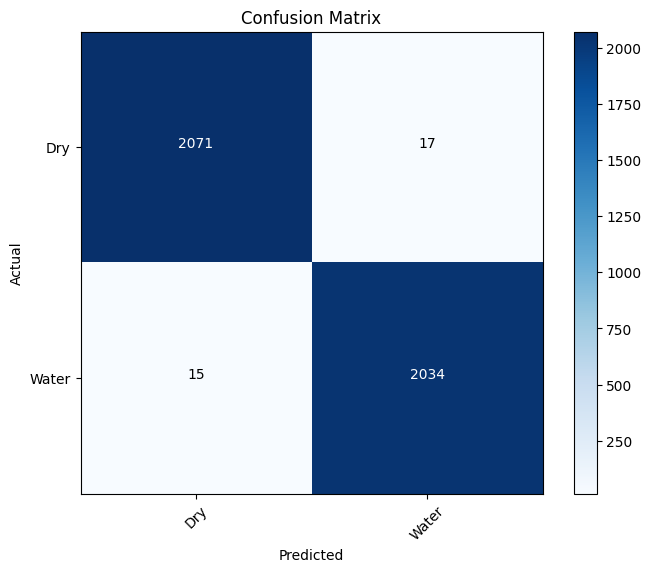

In [164]:
# Validation
y_val_pred = svm_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy}")

# Generate and print classification report
class_report = classification_report(y_val, y_val_pred)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Dry', 'Water']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
thresh = conf_matrix.max() / 2
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()

Actual Test Accuracy: 0.9913903061224489


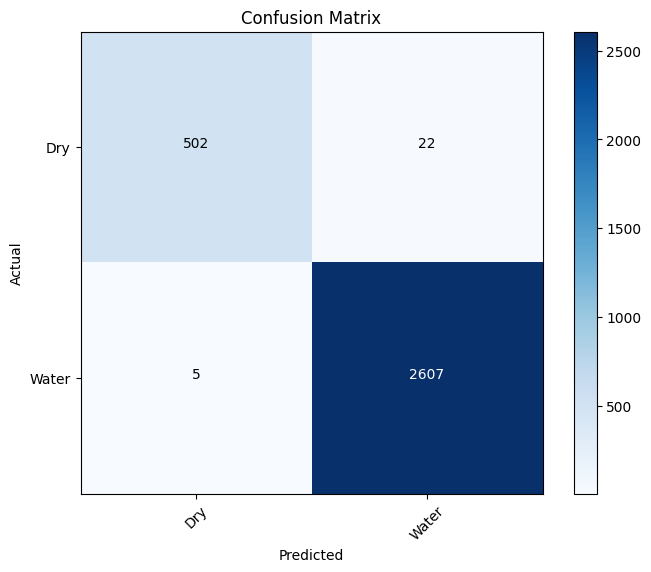

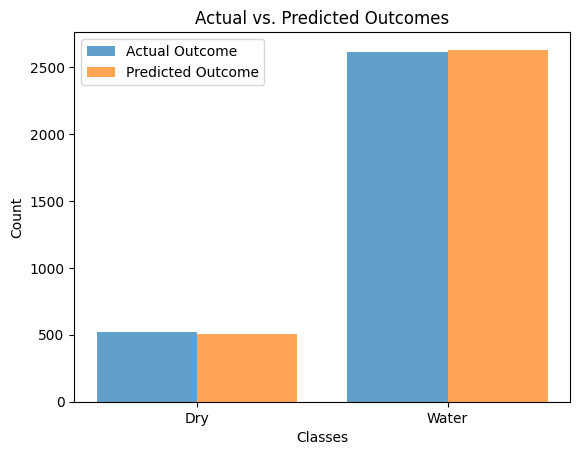

In [165]:
# Testing the model on selected test well
test_well_x = test_df[['GAM(NAT)', 'RES(16N)', 'RES(64N)', 'NEUTRON']]
test_df['TEST_DT'] = svm_model.predict(test_well_x)

# Evaluate the model on the  test set
y_actual = test_df['Interpretation']
y_predicted = test_df['TEST_DT']

# print actual Test Accuracy
accuracy_actual = accuracy_score(y_actual, y_predicted)
print(f'Actual Test Accuracy: {accuracy_actual}')

# Calculate & Visualize the confusion matrix
conf_matrix = confusion_matrix(y_actual, y_predicted)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Dry', 'Water']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
thresh = conf_matrix.max() / 2
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()

# create a bar plot to compare the actual and predicted outcomes
# Create an array of unique classes
classes = test_df['Interpretation'].unique()

# Count the occurrences of each class in y_actual and y_predicted
actual_counts = [sum(y_actual == cls) for cls in classes]
predicted_counts = [sum(y_predicted == cls) for cls in classes]

# Set up the positions of the bars and their width
x = range(len(classes))
width = 0.4

# Create the bar plots
plt.bar(x, actual_counts, width, label='Actual Outcome', align='center', alpha=0.7)
plt.bar([i + width for i in x], predicted_counts, width, label='Predicted Outcome', align='center', alpha=0.7)

# Set labels, title, and legend
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Outcomes')
plt.xticks([i + width/2 for i in x], classes)
plt.legend()

# Show the plot
plt.show()

# 2.4 Random Forest Regressor

In [166]:
from sklearn.ensemble import RandomForestRegressor


In [86]:
# Loading Dataset
df = pd.read_csv('/content/Wells_T202_T213.csv')
print(df.columns)

Index(['Well_ID', 'Depth', 'GAM(NAT)', 'RES(16N)', 'RES(64N)', 'NEUTRON',
       'Interpretation', 'Interpretation_N'],
      dtype='object')


In [87]:
# Loading & Selecting the feature
df = pd.read_csv('/content/Wells_T202_T213.csv', usecols=['Well_ID', 'Depth', 'GAM(NAT)', 'RES(16N)', 'RES(64N)', 'NEUTRON',
       'Interpretation', 'Interpretation_N'])

In [88]:
df['Well_ID'].unique()

array(['1-T-209', '1-T-210', '1-T-211', '1-T-112', '1-T-213', '1-T-202'],
      dtype=object)

In [167]:
# extract the data from the dataset for training and testing
from sklearn.model_selection import train_test_split

train_val_df = df[df['Well_ID'].isin(training_wells)].copy()
test_df = df[df['Well_ID'].isin(testing_well)].copy()

# Deviding dataset to training & testing
training_wells = (['1-T-202',  '1-T-112', '1-T-213', '1-T-210'])
testing_well = (['1-T-209'])

# Selecting training & target feature
x = train_val_df[['GAM(NAT)', 'RES(16N)', 'RES(64N)', 'NEUTRON']]
y = train_val_df[['Interpretation_N']]

In [168]:
# seperating the dataset into training and validation data
x_train, x_val, y_train, y_val =train_test_split(x, y, test_size=0.2)
# test size 0.2 the means 20% of the data will be use for testing

In [169]:
#Building the model
regr = RandomForestRegressor()
regr.fit(x_train, y_train)

<ipython-input-169-65698de6fa59>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train, y_train)


RandomForestRegressor()

Mean Absolute Error (MAE): 0.004592700024172105
Mean Squared Error (MSE): 0.0024970268310369834
Root Mean Squared Error (RMSE): 0.04997025946537584


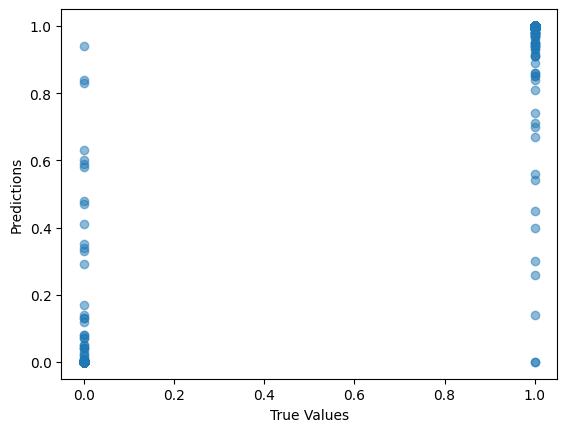

In [170]:
# Test the model with validation data
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

y_pred = regr.predict(x_val)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Scatter plot to compare the actual and predicted values.
plt.scatter(y_val, y_pred, alpha=0.5)  # Scatter plot
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


Interpretation:
- MAE  indicates that, on average, the predictions are very close to the actual values
- The squared differences between predicted values
- RMSE predictions are very close to the actual values.

Scatter plot: Points clustered around the diagonal line indicate accurate predictions, while points scattered away from the line indicate errors in prediction.
In this case all points are falling along the diagonal line (y = x), indicating a perfect prediction.

Mean Absolute Error (MAE): 0.01924107142857143
Mean Squared Error (MSE): 0.007614094387755102
Root Mean Squared Error (RMSE): 0.08725877828479552


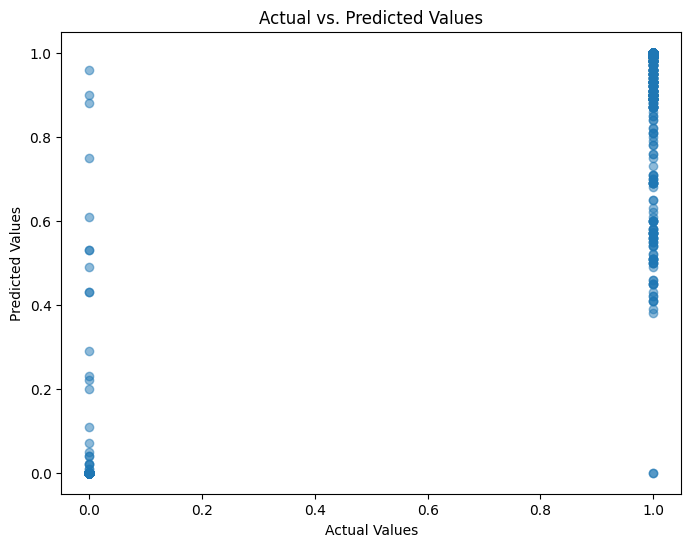

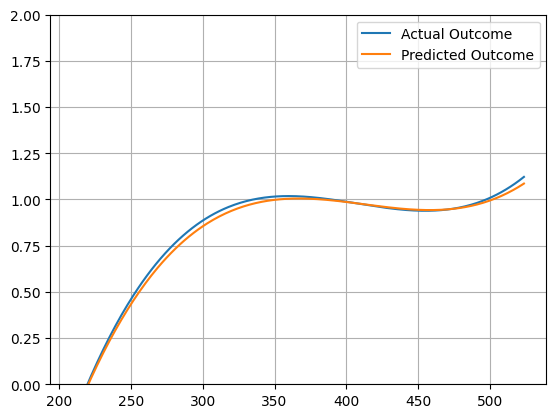

In [171]:
# Testing the model with test dat
test_well_x = test_df[['GAM(NAT)', 'RES(16N)', 'RES(64N)', 'NEUTRON']]
test_df['TEST_DT'] = regr.predict(test_well_x)

actual_values = test_df['Interpretation_N']
predicted_values = test_df['TEST_DT']

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Scatter plot to compare the actual and predicted values.
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, alpha=0.5)  # Scatter plot

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Ploting the Actual Outcome and Predicted Outcome Vs well Depth
x = test_df['Depth']
y_actual = test_df['Interpretation_N']
y_predicted = test_df['TEST_DT']

# Create a smoother curve by polynomial interpolation
x_smooth = np.linspace(x.min(), x.max(), 300)
p_actual = np.polyfit(x, y_actual, 3)
p_predicted = np.polyfit(x, y_predicted, 3)

y_actual_smooth = np.polyval(p_actual, x_smooth)
y_predicted_smooth = np.polyval(p_predicted, x_smooth)

# Plot the smoothed curves
plt.plot(x_smooth, y_actual_smooth, label='Actual Outcome')
plt.plot(x_smooth, y_predicted_smooth, label='Predicted Outcome')
plt.ylim(0, 2)  # Adjusted y-axis limits
plt.grid()
plt.legend()
plt.show()

Feature Importance Plot:

This plot shows the relative importance of each feature in making accurate predictions.
For understanding which features are contributing the most to the model's performance.

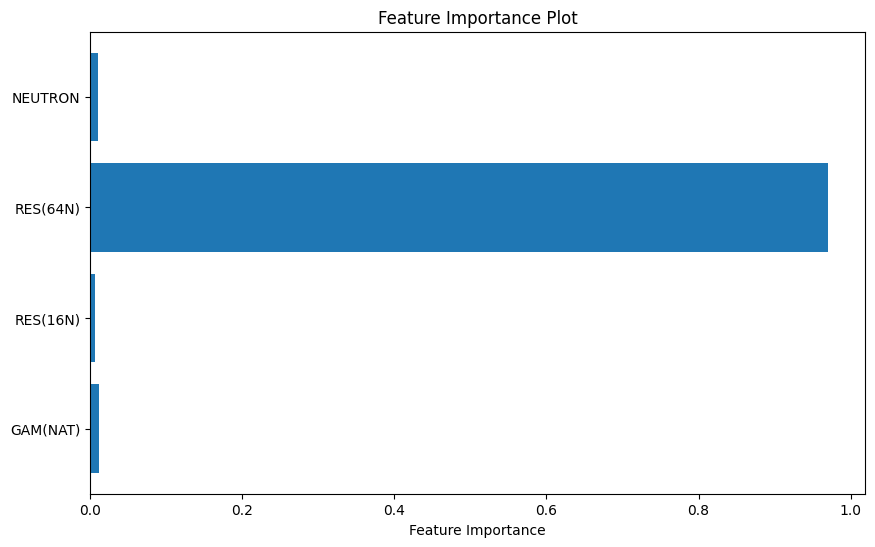

In [172]:
feature_importances = regr.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()


Actual vs. Predicted Plot:.
Shows how well the model's predictions align with the actual data points.

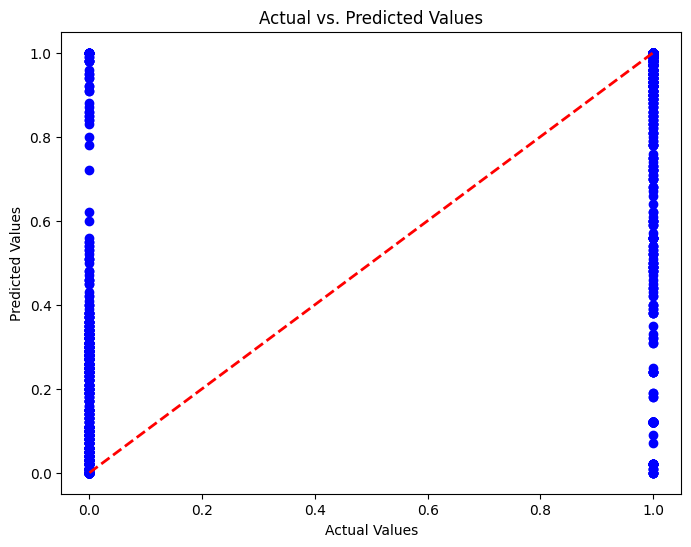

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_predicted, color='blue')
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


To visualize the distribution of residuals, create a histogram or a density plot. This will help to understand if the residuals are normally distributed or if there are any patterns or outliers.

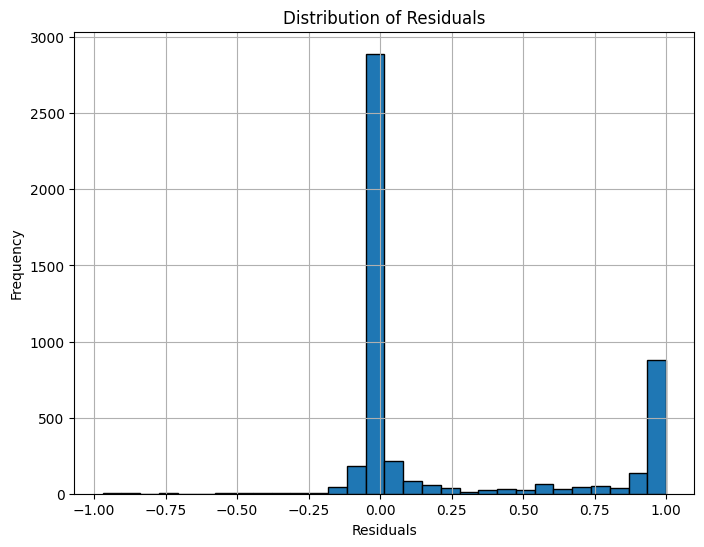

In [ ]:


# Calculate residuals
residuals = [true - pred for true, pred in zip(y_actual, y_predicted)]

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()


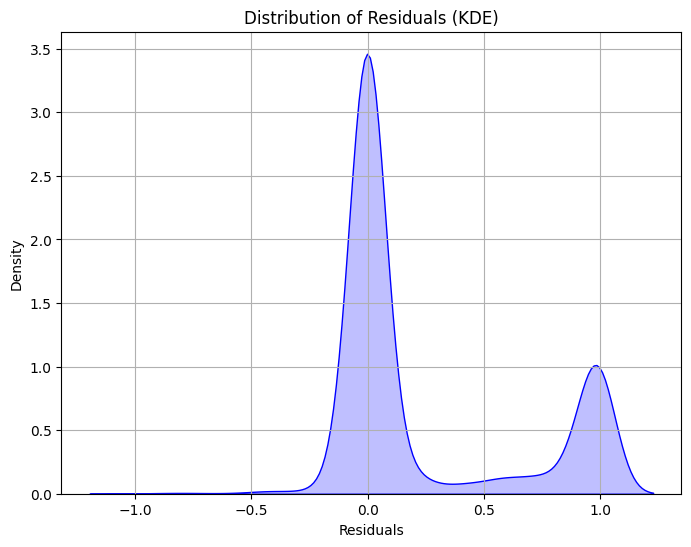

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, color='b', fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals (KDE)')
plt.grid(True)
plt.show()

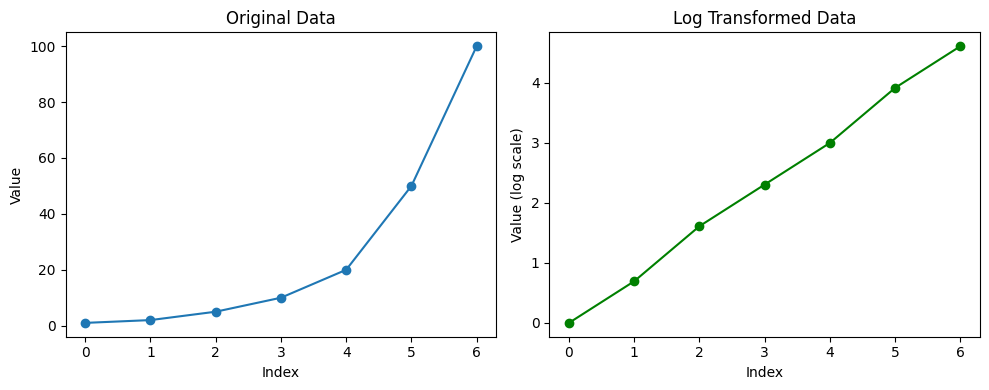

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data (positive values)
data = np.array([1, 2, 5, 10, 20, 50, 100])

# Apply log transformation
transformed_data = np.log(data)

# Plot original and transformed data
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(data, marker='o')
plt.title('Original Data')
plt.xlabel('Index')
plt.ylabel('Value')

plt.subplot(1, 2, 2)
plt.plot(transformed_data, marker='o', color='green')
plt.title('Log Transformed Data')
plt.xlabel('Index')
plt.ylabel('Value (log scale)')

plt.tight_layout()
plt.show()
